In [1]:
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA, TruncatedSVD, KernelPCA, NMF
from glob import glob
from procutil import *
import pickle

Load aoki face and Compute PCA on the data

In [2]:
compute_pca = False
model = None
if compute_pca:
  allimgs_rgb, alldata = load_with_tag("p:aoki")
  model = PCA(n_components=64)
  model.fit(allimgs_rgb)
  with open("pca.pickle", "wb") as f:
    pickle.dump(model, f)
else: 
  with open("pca.pickle", "rb") as f:
    model = pickle.load(f)

Draw the first 3 principal components

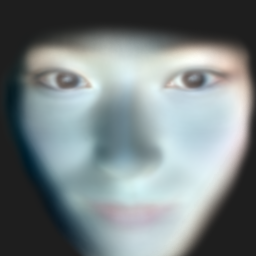

Dimension:  (196608,)


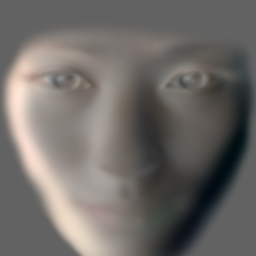

Dimension:  (196608,)


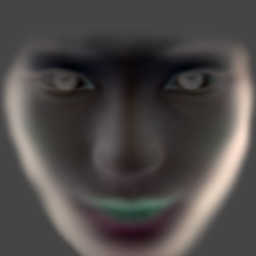

Dimension:  (196608,)


In [9]:
for i in range(3):
  img = model.components_[i]
  ishow(normalize255(img))
  print("Dimension: ", img.shape)

These components are (196608,1) vectors. We can reshape them to (256,256,3) and draw it.

These components are linear combination of the original data. We can reconstruct the original data by add-ing and mul-ing the components.

Now we select the vector with 64 random numbers. This will be a semi-fungible token in the AokiApp NFT. Users will purchase some of these tokens and use them to generate aoki faces.
For now, we just simulate the purchase of the token with random numbers.

In [49]:
# param_tokens is a vector of 64 random numbers
param_tokens = np.random.rand(64)
print("Sum: %f, Mean: %f, stdev: %f" % (np.sum(param_tokens), np.mean(param_tokens), np.std(param_tokens)))

Sum: 33.959168, Mean: 0.530612, stdev: 0.277873


With this token, we can reconstruct the original data and generate aoki faces.

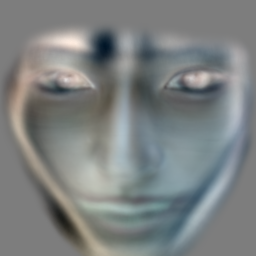

In [50]:
# composite and draw the inverse
pc = model.components_
inverse = param_tokens.T @ pc
ishow(normalize255(inverse))